# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import numpy as np
from glob import glob
from workspace_utils import active_session

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


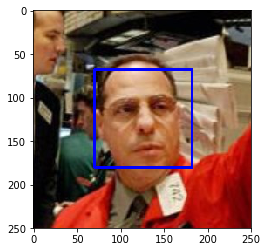

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
humans = []
dogs = []
print("scanning first 100 images in human_files ...")
for human_img in tqdm(human_files_short):
    humans.append(face_detector(human_img))
print("scanning first 100 images in dog_files ...")
for dog_img in tqdm(dog_files_short):
    dogs.append(face_detector(dog_img))
print("{}% of the first 100 images in human_files have a detected human face".format(np.sum(humans)))
print("{}% of the first 100 images in dog_files have a detected human face".format(np.sum(dogs)))

  3%|▎         | 3/100 [00:00<00:03, 26.44it/s]

scanning first 100 images in human_files ...


  1%|          | 1/100 [00:00<00:17,  5.66it/s]

scanning first 100 images in dog_files ...


100%|██████████| 100/100 [00:26<00:00,  3.77it/s]

100% of the first 100 images in human_files have a detected human face
12% of the first 100 images in dog_files have a detected human face


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

### Alternative: face_recognition from https://github.com/ageitgey/face_recognition

In [7]:
!pip install face_recognition

    100% |████████████████████████████████| 3.4MB 9.7MB/s eta 0:00:01
    100% |████████████████████████████████| 100.2MB 445kB/s eta 0:00:01
  Running setup.py bdist_wheel for dlib ... done
  Stored in directory: /root/.cache/pip/wheels/50/b6/b5/5f46aacfd18028ff57591cfb53fcc7554362977c15e9060e67
  Running setup.py bdist_wheel for face-recognition-models ... done
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built dlib face-recognition-models


In [8]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

import face_recognition

def face_detector_fr(img_path):
    image = face_recognition.load_image_file(img_path)
    face_locations = face_recognition.face_locations(image)
    return len(face_locations) > 0

In [9]:
humans = []
dogs = []
print("scanning first 100 images in human_files ...")
for human_img in tqdm(human_files_short):
    humans.append(face_detector_fr(human_img))
print("scanning first 100 images in dog_files ...")
for dog_img in tqdm(dog_files_short):
    dogs.append(face_detector_fr(dog_img))
print("{}% of the first 100 images in human_files have a detected human face".format(np.sum(humans)))
print("{}% of the first 100 images in dog_files have a detected human face".format(np.sum(dogs)))

  2%|▏         | 2/100 [00:00<00:07, 13.48it/s]

scanning first 100 images in human_files ...


  0%|          | 0/100 [00:00<?, ?it/s]

scanning first 100 images in dog_files ...


100%|██████████| 100/100 [00:34<00:00,  2.90it/s]

100% of the first 100 images in human_files have a detected human face
7% of the first 100 images in dog_files have a detected human face


- apparently, the face_recognition (face_detector_fr) achieved better performance, I will use this solution for this project

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [10]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
# use_cuda = False

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 107914019.16it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [11]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

VGG16.eval()
def preprocess_img(img_path, resize=256, crop=224):
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    preprocess = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(crop),
            transforms.ToTensor(),
            normalize,
        ])
    img = Image.open(img_path)
    img = preprocess(img)
    img.unsqueeze_(0)
    if use_cuda:
        img = img.cuda()
    return img

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = preprocess_img(img_path)
    output = VGG16(img)
    return output.argmax().item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    return index in range(151, 269) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
humans = []
dogs = []
print("scanning first 100 images in human_files ...")
for human_img in tqdm(human_files_short):
    humans.append(dog_detector(human_img))
print("scanning first 100 images in dog_files ...")
for dog_img in tqdm(dog_files_short):
    dogs.append(dog_detector(dog_img))
print("{}% of the first 100 images in human_files have a detected dog".format(np.sum(humans)))
print("{}% of the first 100 images in dog_files have a detected dog".format(np.sum(dogs)))

  2%|▏         | 2/100 [00:00<00:05, 18.31it/s]

scanning first 100 images in human_files ...


  3%|▎         | 3/100 [00:00<00:03, 28.29it/s]

scanning first 100 images in dog_files ...


100%|██████████| 100/100 [00:03<00:00, 25.13it/s]

0% of the first 100 images in human_files have a detected dog
99% of the first 100 images in dog_files have a detected dog


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

### Alternative: Inception-v3 Network

In [14]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
inception_v3 = models.inception_v3(pretrained=True)
inception_v3.eval()
if use_cuda:
    inception_v3 = inception_v3.cuda()
def inception_v3_predict(img_path):
    img = preprocess_img(img_path, resize=300, crop=299)
    output = inception_v3(img)
    return output.argmax().item() # predicted class index

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 64410287.39it/s]


In [15]:
def dog_detector_inception(img_path):
    index = inception_v3_predict(img_path)
    return index in range(151, 269) # true/false

In [16]:
humans = []
dogs = []
print("scanning first 100 images in human_files ...")
for human_img in tqdm(human_files_short):
    humans.append(dog_detector_inception(human_img))
print("scanning first 100 images in dog_files ...")
for dog_img in tqdm(dog_files_short):
    dogs.append(dog_detector_inception(dog_img))
print("{}% of the first 100 images in human_files have a detected dog".format(np.sum(humans)))
print("{}% of the first 100 images in dog_files have a detected dog".format(np.sum(dogs)))

  2%|▏         | 2/100 [00:00<00:05, 18.45it/s]

scanning first 100 images in human_files ...


  4%|▍         | 4/100 [00:00<00:03, 30.32it/s]

scanning first 100 images in dog_files ...


100%|██████████| 100/100 [00:04<00:00, 24.79it/s]

1% of the first 100 images in human_files have a detected dog
100% of the first 100 images in dog_files have a detected dog


- It turns out that **Inceiption-v3** detects dogs slightly better than **VGG16**, we will use this solution for this project

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [17]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
data_dir = 'dogImages'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

batch_size = 128
output_size = 133
num_workers = 0
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
input_size = 224
train_transfo = transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])
test_transfo = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        normalize,
    ])

train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(train_dir, train_transfo),
    batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)

valid_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(valid_dir, test_transfo),
    batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

test_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(test_dir, test_transfo),
    batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

print('size of train data:{}'.format(len(train_loader.dataset)))
print('size of validation data:{}'.format(len(valid_loader.dataset)))
print('size of test data:{}'.format(len(test_loader.dataset)))

size of train data:6680
size of validation data:835
size of test data:836


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: <br>
- The training images are randomly resized, the validation and test images are resized to 256 X 256. And then all images are cropped into size of 224 X 224. I choose 224 X 224 for two reason:
    - firstly, many models are trained from ImageNet using this size, and our images are from ImageNet, this size might not be the best one, but at least is proven worked.  
    - secondly, most of the pretrained models for vision in pytorch use the size of 224 X 224 as input size, in order to compare the model I build with the transfer learning, it's more efficient to keep the same image format for these two types of models
- Our goal is to achieve the accurancy above 10%, a small improvement is relevant. This is why I decided to augment the dataset in order to further improve (even just slightly) the model's performance. For this, I randomly resize and crop the image into fixed size, then randomly rotate the image by 15 degrees, and randomly flip the image in the horizontal direction. This augmentation is only performed on training images.


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [18]:
import torch.nn as nn
import torch.nn.functional as F


# takes in a module and applies the specified weight initialization
def weights_init_normal(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = (1.0/np.sqrt(n))
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 24, 11, stride=4, padding=1)
        self.conv2 = nn.Conv2d(24, 64, 5, padding=2)
        self.conv3 = nn.Conv2d(64, 48, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2)
        self.dropout = nn.Dropout(0.2)
        
        self.dense1 = nn.Linear(48 * 6 * 6, 512)
        self.dense2 = nn.Linear(512, output_size)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(-1, 48 * 6 * 6)
        x = self.dropout(x)
        x = self.dense1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.dense2(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

### initilize weights using normal distribution

In [19]:
model_scratch.apply(weights_init_normal)
model_scratch

Net(
  (conv1): Conv2d(3, 24, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
  (conv2): Conv2d(24, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(64, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2)
  (dense1): Linear(in_features=1728, out_features=512, bias=True)
  (dense2): Linear(in_features=512, out_features=133, bias=True)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ <br>
- Firstly, I look at some existing architectures for image classification, someone must have done this with a convincing result. From the links provided by the lesson named "Groundbreaking CNN Architectures", I found [AlexNet](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) very inspiring.
- AlexNet has 5 convolutional layers and 3 dense layers, it has been trained over 1.2 million samples ant it took days of training. It is too complexe for my problem to solve here, so I decide to build a simplified version of AlexNet.
- Instead of totally 8 layers, I will use 3 convolutional layers and 3 sense layers with fully connected neurons, including the output layer with 1000 ouput size.
- For the convolutional layers, I use half of the channels compared to AlexNet in order to reduce the complexity of the network. But I keep the ReLU activation function and the MaxPooling Layer at the end of each convonlutional layer. 
- For the dense layers, I downsized the hidden layer to 512 along with a dropout of 20% at each hidden layer for the same reason of simplification. I also change the input size of the first dense layer according to the output size of last convolutional layer, and change the output size of last dense layer to 133 as the number of classes.
- Finally, I use normal distribution to initialize the network weights.
- I will test the architecture described above, if the result is not good, I will come back and make some adjustment

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [20]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

if use_cuda:
    criterion_scratch = criterion_scratch.cuda()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.002)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [21]:
if use_cuda:
    print('Using GPU for training')
else:
    print('Using CPU for training')

Using GPU for training


In [26]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(non_blocking=True), target.cuda(non_blocking=True)
            
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(non_blocking=True), target.cuda(non_blocking=True)
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
            
    # return trained model
    return model

In [24]:
loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

with active_session():
# train the model
    model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                          criterion_scratch, use_cuda, 'model_scratch.pt')

    # load the model that got the best validation accuracy
    model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.868670 	Validation Loss: 4.825649
Epoch: 2 	Training Loss: 4.767366 	Validation Loss: 4.565589
Epoch: 3 	Training Loss: 4.615815 	Validation Loss: 4.528228
Epoch: 4 	Training Loss: 4.533124 	Validation Loss: 4.369385
Epoch: 5 	Training Loss: 4.457256 	Validation Loss: 4.447119
Epoch: 6 	Training Loss: 4.448620 	Validation Loss: 4.330763
Epoch: 7 	Training Loss: 4.371634 	Validation Loss: 4.280231
Epoch: 8 	Training Loss: 4.326474 	Validation Loss: 4.209417
Epoch: 9 	Training Loss: 4.290500 	Validation Loss: 4.128766
Epoch: 10 	Training Loss: 4.232451 	Validation Loss: 4.115206
Epoch: 11 	Training Loss: 4.227409 	Validation Loss: 4.082998
Epoch: 12 	Training Loss: 4.197065 	Validation Loss: 4.070948
Epoch: 13 	Training Loss: 4.149333 	Validation Loss: 4.064896
Epoch: 14 	Training Loss: 4.128557 	Validation Loss: 4.044371
Epoch: 15 	Training Loss: 4.105744 	Validation Loss: 3.961692
Epoch: 16 	Training Loss: 4.064248 	Validation Loss: 3.937093
Epoch: 17 	Traini

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [29]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [25]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.468894


Test Accuracy: 19% (161/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [105]:
## TODO: Specify data loaders
### Use the same data loaders from previous step, nothing to add

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [106]:
import torchvision.models as models
import torch.nn as nn
    
## TODO: Specify model architecture 
model_transfer = models.resnet152(pretrained=True)

# Freeze training for all layers
for param in model_transfer.parameters():
    param.requires_grad = False

# Replace the classification layer    
n_inputs = model_transfer.fc.in_features
last_layer = nn.Sequential(nn.Linear(n_inputs, 1024),
                           nn.ReLU(True),
                           nn.BatchNorm1d(1024),
                           nn.Dropout(0.3),
                           nn.Linear(1024, 512),
                           nn.ReLU(True),
                           nn.BatchNorm1d(512),
                           nn.Dropout(0.3),
                           nn.Linear(512, output_size))
model_transfer.fc = last_layer
train_layers = model_transfer.fc

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ <br>
- The [pretrained models from pytorch v0.4.0](https://pytorch.org/docs/0.4.0/torchvision/models.html) have been trained from millions of images from ImageNet, those models are suitable candidates for the current problem, because:
    - the huge database of ImageNet covers very common objects for image classification including dogs and faces, which are relevent to the current problem.
    - these pretrained models are the work results of recent popular papers, which have been widely used and proven.
- The goal is to achieve the accuracy above 60%, from the list of [pretrained models from pytorch v0.4.0](https://pytorch.org/docs/0.4.0/torchvision/models.html), I exlude the models with top-1 error > 40% on image classification.
- I exlude Inception v3 because it has an auxillary classifier, which should be specifically treated, this is probably out of the scope of this lesson. And as mentioned earlier, I have sized the image to 224x224 which is different from 299x299, the input size of Inception v3
- For the survived models, 3 types of models perform better than others based on the top-1 error score:
    - VGG with Batch normalization
    - ResNet
    - DenseNet
- I then test the 3 above networks for 10 epochs and compare the results in order to choose the best one among them

|model|vgg19_bn|resnet152|densenet161|
|-------------|--------|--------|--------|
|**Validation loss** | 3.750247 | 3.348856 | 3.612120 |
|**Test Accuracy** | 53% | 62% | 55% |

- The test results show that the best model for our problem is **ResNet**, this is the model architecture I will use for my application


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [107]:
criterion_transfer = nn.CrossEntropyLoss()

if use_cuda:
    criterion_transfer = criterion_transfer.cuda()
    
optimizer_transfer = optim.SGD(train_layers.parameters(), lr=0.002)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [108]:
# train the model
loaders_transfer = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}
n_epochs = 60
model_transfer_file = 'model_transfer.pt'
with active_session():
    model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, model_transfer_file)
    # load the model that got the best validation accuracy (uncomment the line below)
    model_transfer.load_state_dict(torch.load(model_transfer_file))

Epoch: 1 	Training Loss: 4.891116 	Validation Loss: 4.737020
Epoch: 2 	Training Loss: 4.710281 	Validation Loss: 4.489754
Epoch: 3 	Training Loss: 4.529077 	Validation Loss: 4.280169
Epoch: 4 	Training Loss: 4.366329 	Validation Loss: 4.083880
Epoch: 5 	Training Loss: 4.217334 	Validation Loss: 3.906075
Epoch: 6 	Training Loss: 4.072484 	Validation Loss: 3.736076
Epoch: 7 	Training Loss: 3.940374 	Validation Loss: 3.582085
Epoch: 8 	Training Loss: 3.821972 	Validation Loss: 3.441542
Epoch: 9 	Training Loss: 3.706581 	Validation Loss: 3.322771
Epoch: 10 	Training Loss: 3.612598 	Validation Loss: 3.189181
Epoch: 11 	Training Loss: 3.518907 	Validation Loss: 3.080400
Epoch: 12 	Training Loss: 3.436672 	Validation Loss: 2.977544
Epoch: 13 	Training Loss: 3.330986 	Validation Loss: 2.891440
Epoch: 14 	Training Loss: 3.266107 	Validation Loss: 2.806295
Epoch: 15 	Training Loss: 3.194721 	Validation Loss: 2.717775
Epoch: 16 	Training Loss: 3.121343 	Validation Loss: 2.632091
Epoch: 17 	Traini

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [109]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.162010


Test Accuracy: 81% (678/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [126]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_loader.dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = preprocess_img(img_path)
    output = model_transfer(img)
    top1 = F.softmax(output, dim=-1).max(1, keepdim=True)
    # convert output probabilities to predicted class
    idx = top1[1].item()
    value = top1[0].item()
    name = class_names[idx]
    # for dog mutts, this algorithm is very likely to fail, we check if the probability is greater than 65%
    return class_names[idx]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [127]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img=mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()
    is_dog = dog_detector_inception(img_path)
    is_human = face_detector_fr(img_path)
    if is_dog or is_human:
        print('Hello, {}!'.format('dog' if is_dog else 'human'))
        print('You look like a ...')
        name = predict_breed_transfer(img_path)
        print(name)
    else:
        print('Hello, you look unfamiliar, I cannot recogonize you.')
        

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)<br>

The output is almost as well as I expected. However, there are some improvements we can come up with:

- use recent preprained models such as ResNext which shows better performance on image classification, this requires [new version of pytorch](https://pytorch.org/docs/stable/torchvision/models.html)
- train more epochs for dog image classification as the validation loss is likely going to decrease furthur more.
- add more labeled images of dogs in order to increase the training data size
- build an ensemble model from multiple trained models for better image classification performance
- instead of running this applicaiton on backend, we can deploy it within a web page on a webserver using frameworks such as [Django](https://www.djangoproject.com/). This also allows user to upload an image.

In [130]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

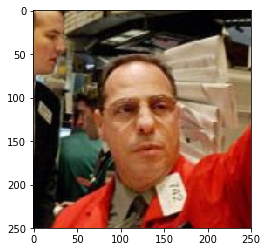

Hello, human!
You look like a ...
Dachshund


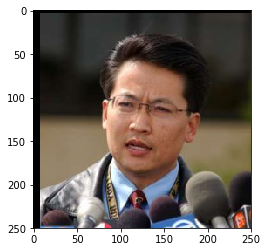

Hello, human!
You look like a ...
French bulldog


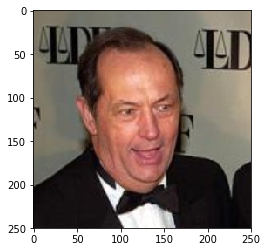

Hello, human!
You look like a ...
Lhasa apso


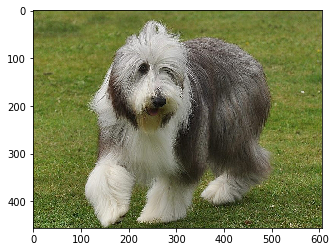

Hello, dog!
You look like a ...
Bearded collie


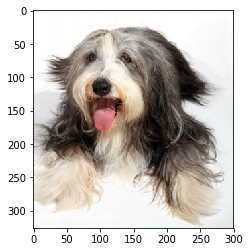

Hello, dog!
You look like a ...
Bearded collie


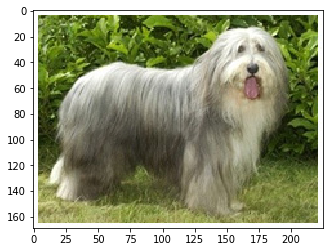

Hello, dog!
You look like a ...
Bearded collie


In [131]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

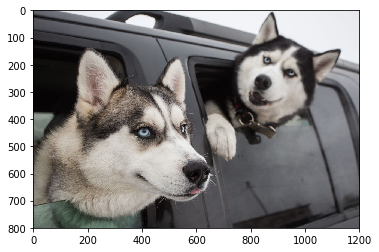

Hello, dog!
You look like a ...
Alaskan malamute


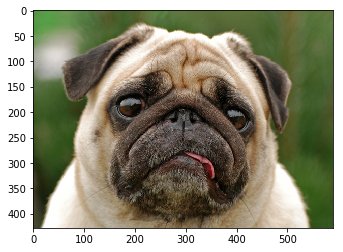

Hello, dog!
You look like a ...
Bulldog


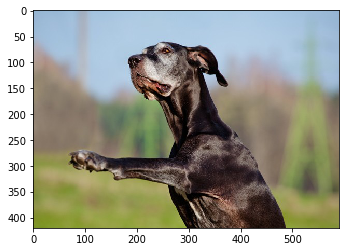

Hello, dog!
You look like a ...
Greyhound


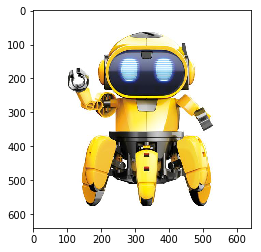

Hello, you look unfamiliar, I cannot recogonize you.


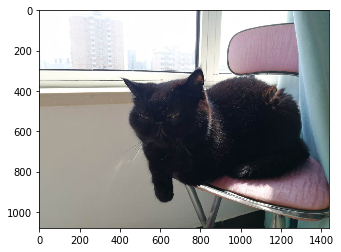

Hello, you look unfamiliar, I cannot recogonize you.


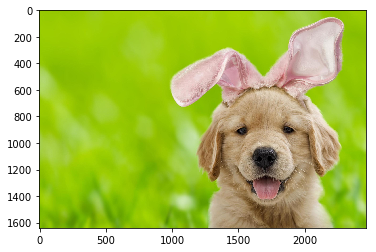

Hello, dog!
You look like a ...
Golden retriever


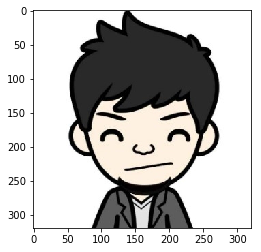

Hello, you look unfamiliar, I cannot recogonize you.


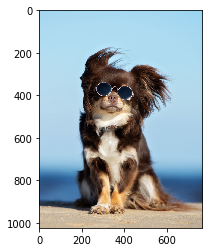

Hello, you look unfamiliar, I cannot recogonize you.


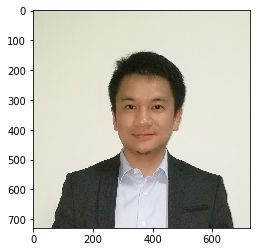

Hello, human!
You look like a ...
Miniature schnauzer


In [132]:
from glob import glob
from os import path
test_images = []
test_images.extend(glob(path.join("test", '*.jpg')))

for img_file in test_images:
    run_app(img_file)